In [1]:
import pandas as pd

df_train = pd.read_csv('reduced_data/df_train_final.csv')
df_train.head()


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card2_nan,card3,card3_nan,...,A21,A21_nan,A22,A22_nan,A23,A23_nan,A24,A24_nan,A26,A26_nan
0,2987000,0,86400,68.5,5,13926,0.0,1,150.0,0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
1,2987001,0,86401,29.0,5,2755,404.0,0,150.0,0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2,2987002,0,86469,59.0,5,4663,490.0,0,150.0,0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3,2987003,0,86499,50.0,5,18132,567.0,0,150.0,0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
4,2987004,0,86506,50.0,2,4497,514.0,0,150.0,0,...,0.0,1,0.0,1,0.0,1,100.0,0,0.0,1


In [2]:
df_test = pd.read_csv('reduced_data/df_test_final.csv')
df_test.head()


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card2_nan,card3,card3_nan,card4,...,A15,A15_nan,A16,A16_nan,A17,A17_nan,A18,A18_nan,A19,A19_nan
0,3663549,18403224,31.95,5,10409,111.0,0,150.0,0,4.0,...,0.0,1,0.0,1,0.0,1,3.153125,0,0.0,1
1,3663550,18403263,49.00,5,4272,111.0,0,150.0,0,4.0,...,0.0,1,0.0,1,0.0,1,22.625000,0,0.0,1
2,3663551,18403310,171.00,5,4476,574.0,0,150.0,0,4.0,...,0.0,1,0.0,1,0.0,1,82.906250,0,0.0,1
3,3663552,18403310,284.95,5,10989,360.0,0,150.0,0,4.0,...,0.0,1,0.0,1,0.0,1,0.125000,0,0.0,1
4,3663553,18403317,67.95,5,18018,452.0,0,150.0,0,3.0,...,0.0,1,0.0,1,0.0,1,22.482812,0,0.0,1


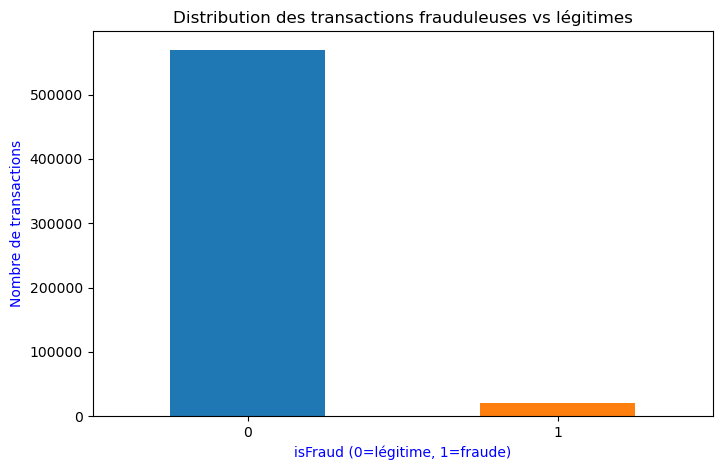

isFraud
0    96.500999
1     3.499001
Name: proportion, dtype: float64


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution des Fraudes
plt.figure(figsize=(8, 5))
df_train['isFraud'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Distribution des transactions frauduleuses vs légitimes')
plt.xlabel('isFraud (0=légitime, 1=fraude)', c='b')
plt.xticks(rotation=0)
plt.ylabel('Nombre de transactions', c='b')
plt.savefig('visualisations/distribution_fraudes.png')
plt.show()

# Pourcentage
print(df_train['isFraud'].value_counts(normalize=True) * 100)

### Observations : 
- La majorité des transactions sont normales.
- Le dataset est déséquilibré, et ce déséquilibrage va poser un problème d'apprentissage pour les modèles.

In [4]:
# Corrélation avec la target (isFraud)
import numpy as np

corr = df_train.corr()['isFraud'].drop('isFraud') # Enlever isFraud lui-même

corr

TransactionID     0.014166
TransactionDT     0.013103
TransactionAmt    0.011320
ProductCD        -0.156556
card1            -0.013640
                    ...   
A23_nan          -0.024333
A24               0.135928
A24_nan          -0.135866
A26               0.028842
A26_nan          -0.024252
Name: isFraud, Length: 181, dtype: float64

In [5]:
# une corrélation très négative est tout aussi "forte" qu'une corrélation très positive
corr_sorted = corr.abs().sort_values(ascending=False)
corr_sorted

D7_nan       0.164478
A1_nan       0.159479
D12_nan      0.157344
ProductCD    0.156556
D14_nan      0.151227
               ...   
D13          0.002279
A14          0.001290
card2        0.000960
A3           0.000569
A2_nan       0.000318
Name: isFraud, Length: 181, dtype: float64

In [6]:
# Récupérer les valeurs SIGNÉES (pas abs) dans le bon ordre
corr_values = corr[corr_sorted.index]
corr_values

D7_nan      -0.164478
A1_nan       0.159479
D12_nan     -0.157344
ProductCD   -0.156556
D14_nan     -0.151227
               ...   
D13          0.002279
A14         -0.001290
card2        0.000960
A3           0.000569
A2_nan       0.000318
Name: isFraud, Length: 181, dtype: float64

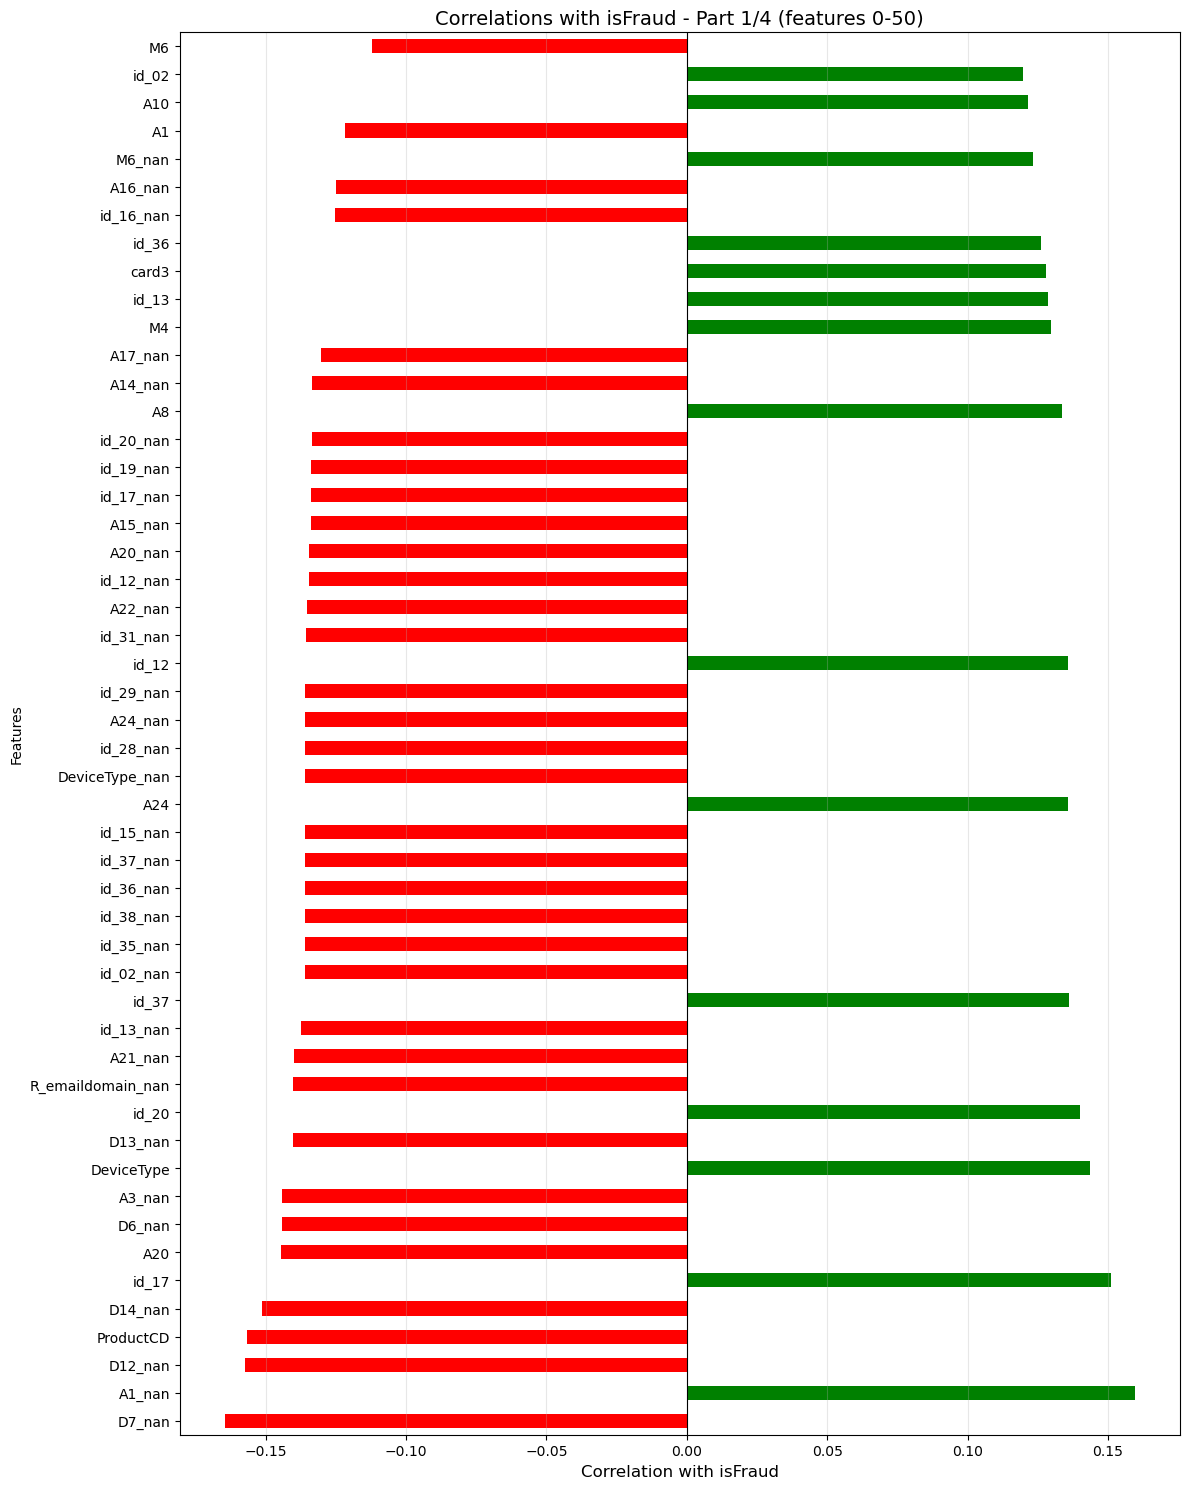

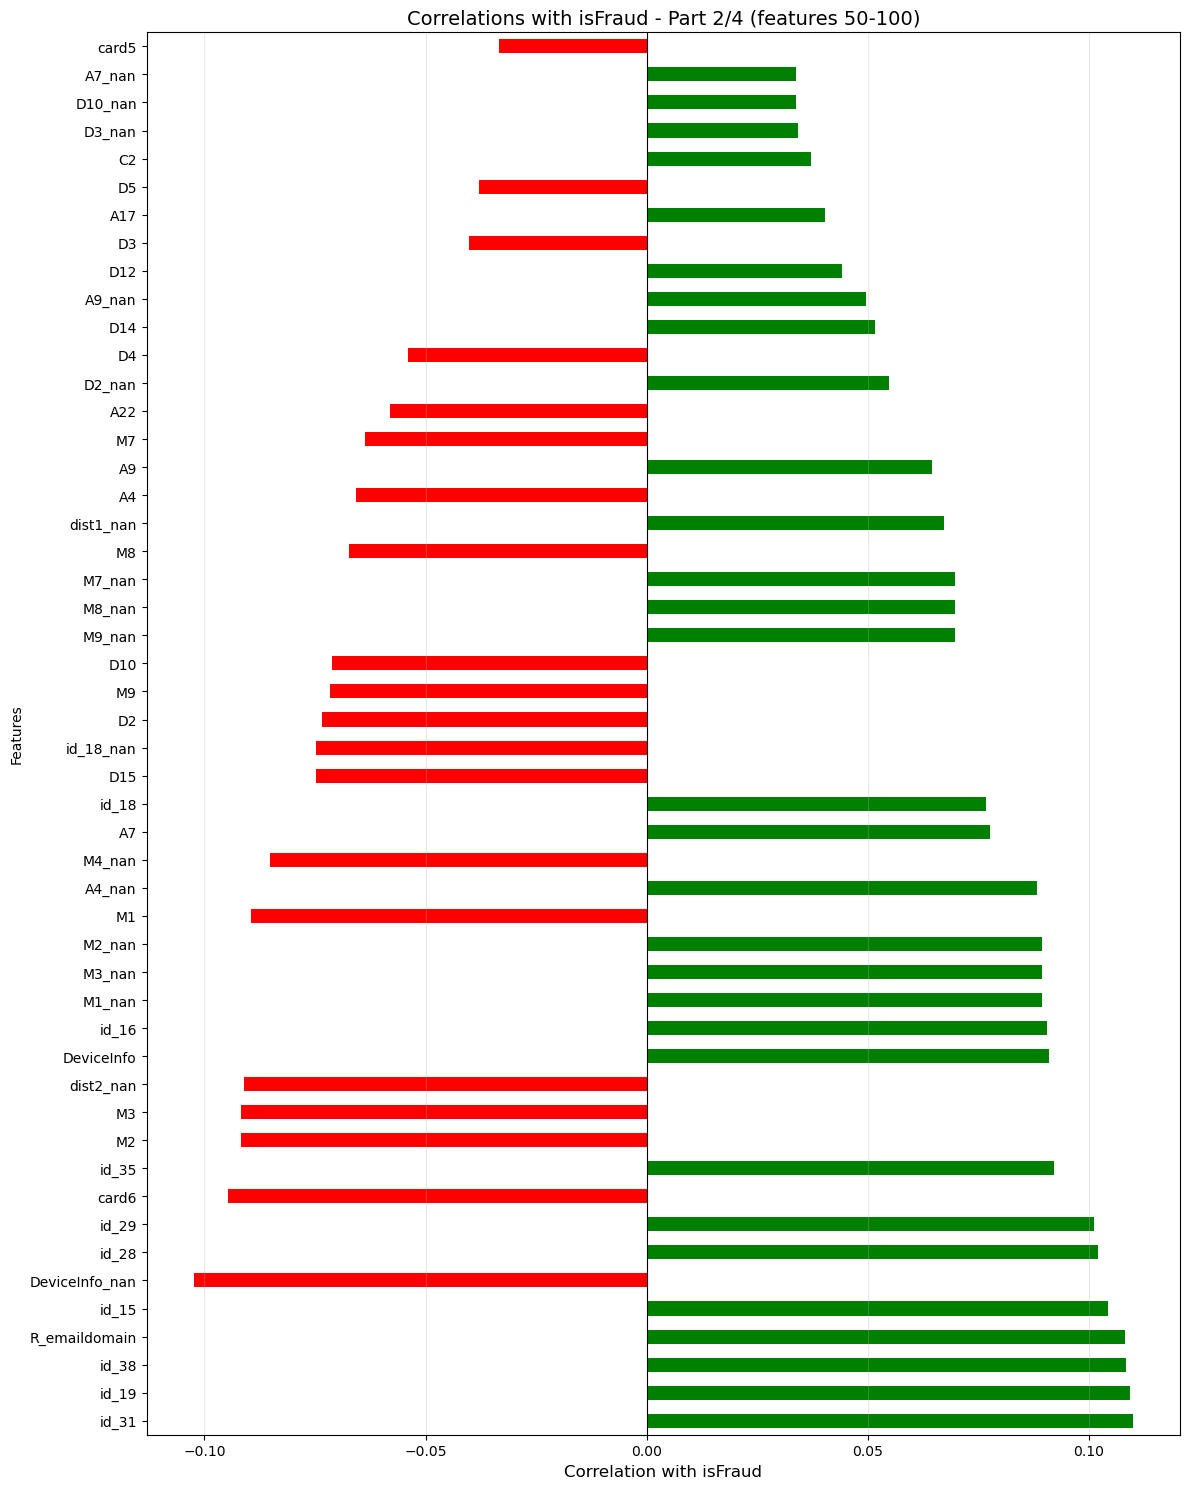

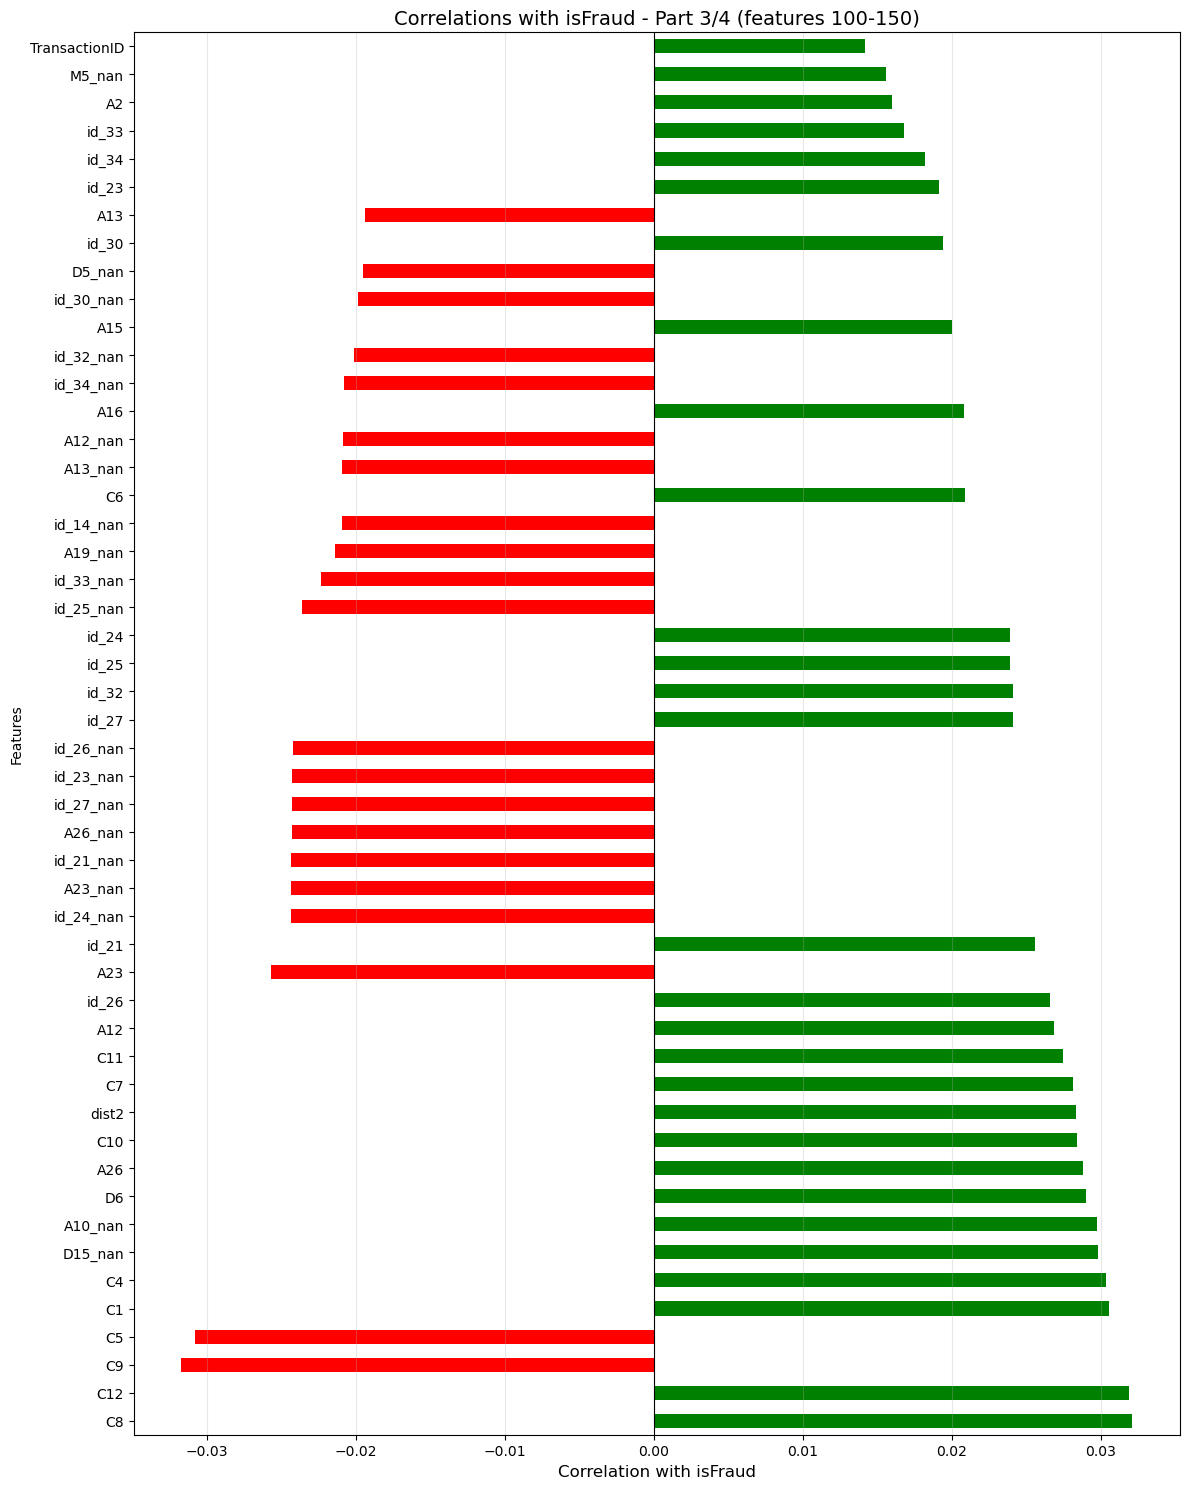

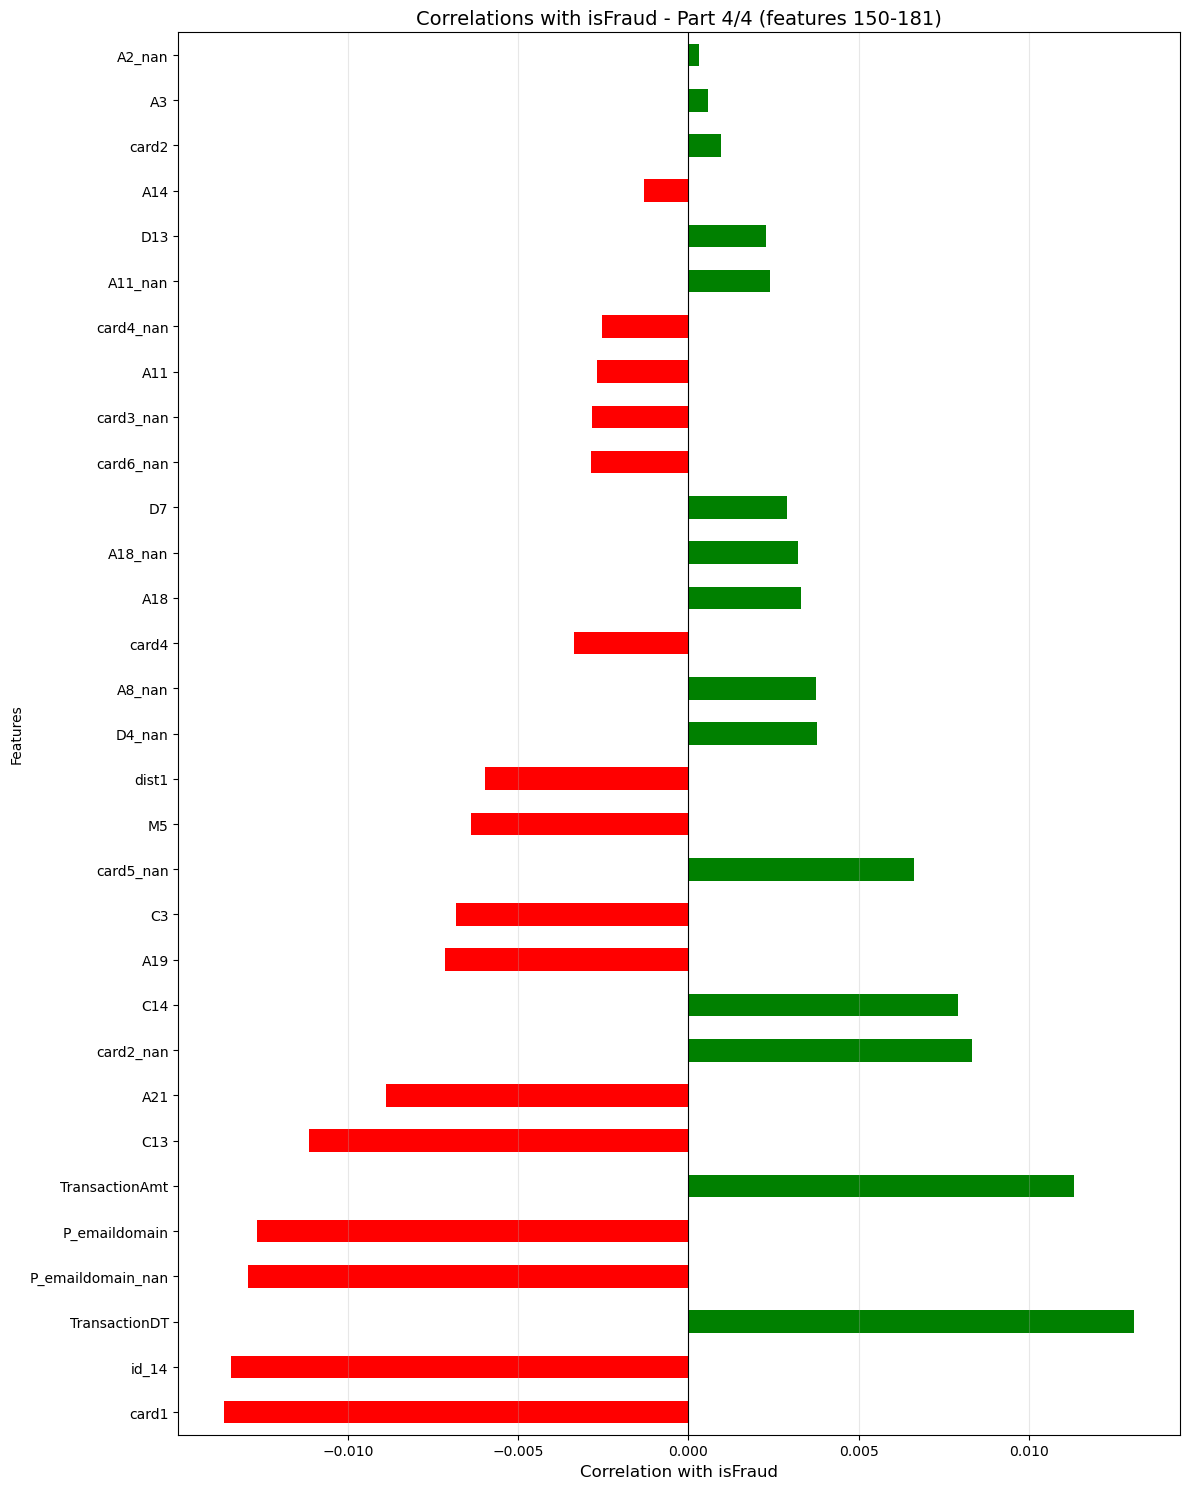

In [7]:
import math

# Diviser en plusieurs graphiques
n_features = len(corr_sorted)
features_per_plot = 50

n_plots = math.ceil(n_features / features_per_plot)

for i in range(n_plots):
    start_idx = i * features_per_plot
    end_idx = min((i + 1) * features_per_plot, n_features)
    
    subset = corr_values.iloc[start_idx:end_idx]
    colors = ['red' if x < 0 else 'green' for x in subset]
    
    plt.figure(figsize=(12, 15))
    subset.plot(kind='barh', color=colors)
    plt.xlabel('Correlation with isFraud', fontsize=12)
    plt.ylabel('Features', fontsize=10)
    plt.title(f'Correlations with isFraud - Part {i+1}/{n_plots} (features {start_idx}-{end_idx})', fontsize=14)
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'visualisations/correlation_fraud_part{i+1}.png', dpi=300, bbox_inches='tight')
    plt.show()

### Observations :
- On a fait une analyse de corrélation pour comprendre quelles variables (features) du jeu de données sont le plus liées au fait qu’une transaction soit frauduleuse (isFraud = 1) ou non (isFraud = 0).

- En rouge 🔴  = corrélation négative (diminue la probabilité de fraude)

- En vert   🟢  = corrélation positive (augmente la probabilité de fraude)

#####        🎯 Interprétation des variables _nan
- Les variables _nan sont des indicateurs binaires (0/1) qui marquent si la valeur originale était manquante.

- Beaucoup de variables _nan sont fortement corrélées, suggérant que l'absence d'information est elle-même prédictive de fraude.

In [8]:
# Impact du missing 
nan_cols = [col for col in df_train.columns if col.endswith('_nan')]
nan_corr = df_train[nan_cols +['isFraud']].corr()['isFraud'].drop('isFraud').sort_values(ascending=False)
nan_corr

A1_nan     0.159479
M6_nan     0.123176
M1_nan     0.089417
M2_nan     0.089417
M3_nan     0.089417
             ...   
A3_nan    -0.144123
D6_nan    -0.144233
D14_nan   -0.151227
D12_nan   -0.157344
D7_nan    -0.164478
Name: isFraud, Length: 81, dtype: float64

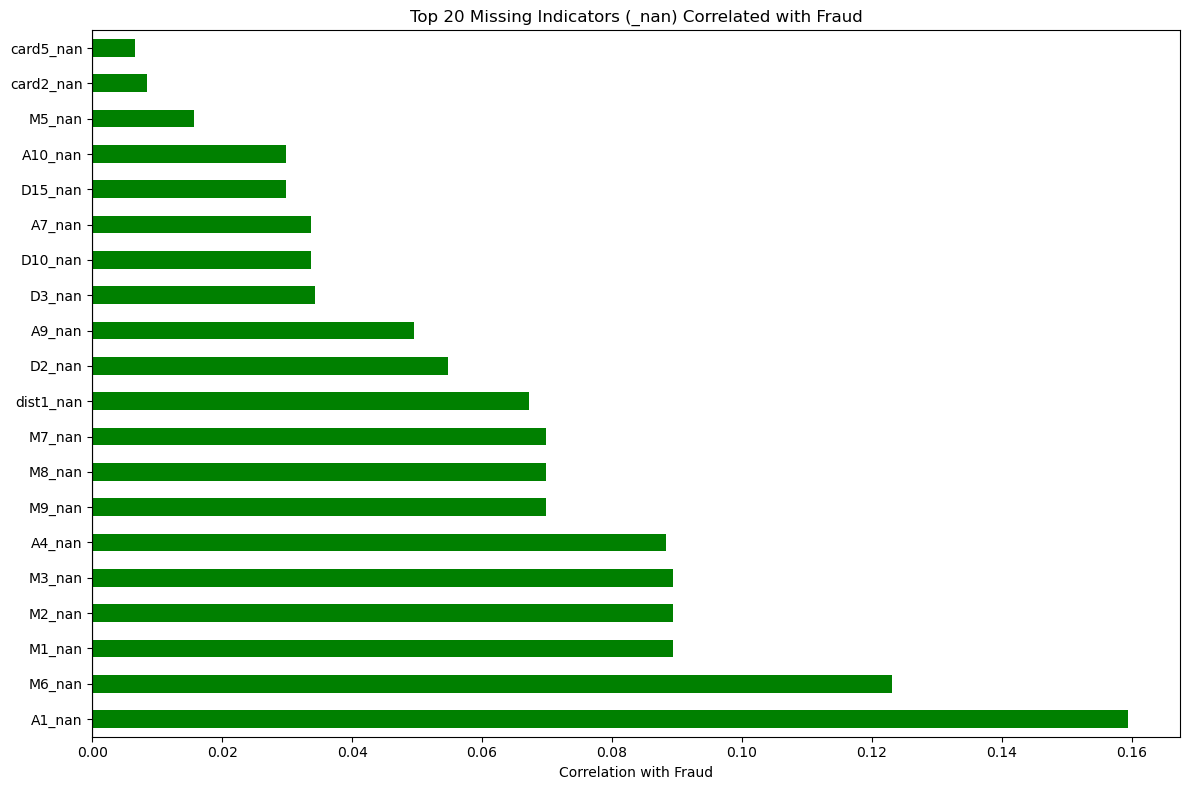

In [9]:
# plot
plt.figure(figsize=(12, 8))
nan_corr.head(20).plot(kind='barh', color=['green' if x > 0 else 'red' for x in nan_corr.head(20)])
plt.xlabel('Correlation with Fraud')
plt.title('Top 20 Missing Indicators (_nan) Correlated with Fraud')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.tight_layout()
plt.savefig('visualisations/nan_corr_fraud.png', dpi=300, bbox_inches='tight')
plt.show()

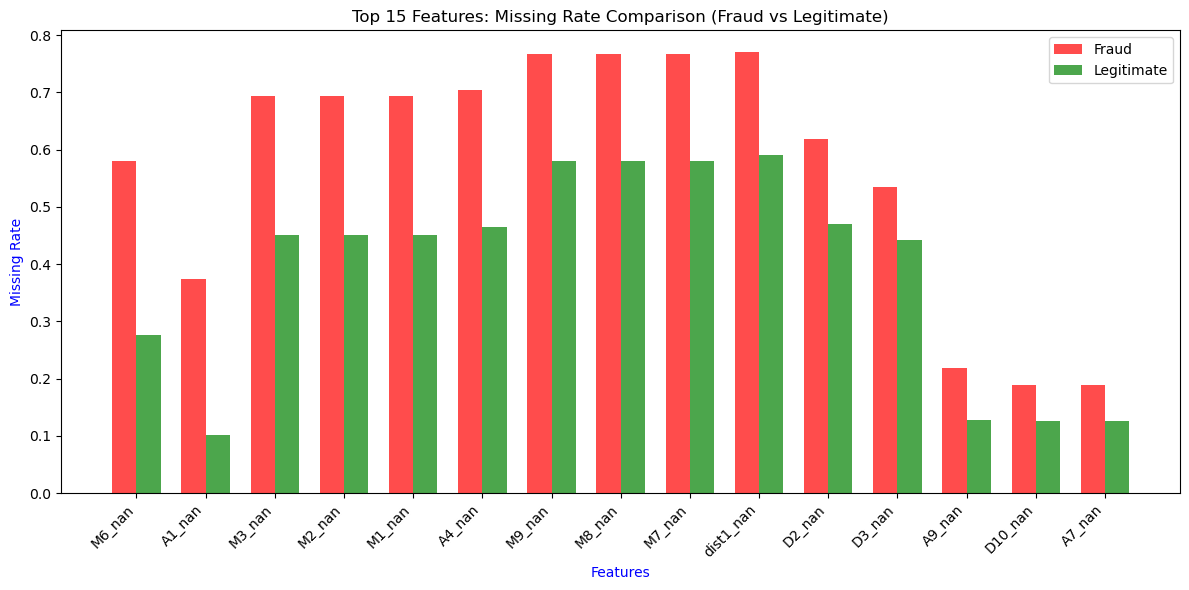

In [10]:
# Comparer le taux moyen de missing entre fraude et non-fraude
fraud_missing = df_train[df_train['isFraud'] == 1][nan_cols].mean()
legit_missing = df_train[df_train['isFraud'] == 0][nan_cols].mean()

comparison = pd.DataFrame({
    'Fraud': fraud_missing,
    'Legitimate': legit_missing,
    'Difference': fraud_missing - legit_missing
}).sort_values('Difference', ascending=False).head(15)

plt.figure(figsize=(12, 6))
x = np.arange(len(comparison))
width = 0.35
plt.bar(x - width/2, comparison['Fraud'], width, label='Fraud', color='red', alpha=0.7)
plt.bar(x + width/2, comparison['Legitimate'], width, label='Legitimate', color='green', alpha=0.7)
plt.xlabel('Features', c='b')
plt.ylabel('Missing Rate', c='b')
plt.title('Top 15 Features: Missing Rate Comparison (Fraud vs Legitimate)')
plt.xticks(x, comparison.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# Feature Importance via Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
 
X = df_train.drop(['TransactionID', 'isFraud'], axis=1)
y = df_train['isFraud']

# On crée un train/validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
    )

# On entraîne le modèle 
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10
)

rf.fit(X_train, y_train)

# On évalue sur le validation set
y_pred = rf.predict(X_val)

# On calcule la précision
accuracy = accuracy_score(y_val, y_pred)
print(f"Précision du modèle : {accuracy:.4f}")
print("Accuracy:", (y_pred == y_val).mean())




Précision du modèle : 0.9737
Accuracy: 0.9737020354252041


- L'accuracy n'est pas suffisantes dans les problèmes déséquilibrés.

- Donc on regarde:
    - Recall (Sensibilité) : Parmi les fraudes réelles, combien le modèle en détecte?
    - Precision : Parmi les transactions détectées comme fraudem combien le sont pas vraiment
    - F1-score : Moyenne harmonique de précision et recall
    - Matrice de confusion → combien de fraudes manquées, combien de faux positifs.

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred, digits=4))


[[113884     91]
 [  3015   1118]]
              precision    recall  f1-score   support

           0     0.9742    0.9992    0.9865    113975
           1     0.9247    0.2705    0.4186      4133

    accuracy                         0.9737    118108
   macro avg     0.9495    0.6349    0.7026    118108
weighted avg     0.9725    0.9737    0.9667    118108



- Interprétation de la matrice de confusion :

    - 113 884 vraies transactions bien classées comme non frauduleuses.
    - 91 transactions normales faussement marquées comme fraude (faux positifs).
    - 3015 fraudes non détectées (faux négatifs)
    - 1 118 fraudes correctement détectées

- Interprétation Rapport :
    
    - Le modèle a une accuracy très élevée (0.9737) parce qu’il gère très bien les non-fraudes (classe majoritaire).
    - Mais son recall pour la fraude est bas (27 %), donc : Le modèle passe à côté de 73 % des fraudes réelles.

### Observations :
- On veut donc maximiser le recall de la classe 1 (fraude), même si ça fait baisser un peu la précision.

##### Amélioration du RF :

Le problème : On a 96.5% de non-fraudes, 3.5% de fraudes → Déséquilibré !
➡️ On va utiliser SMOTE pour créer des faux exemples de fraudes (synthétiques) pour équilibrer.

In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Préparation
X = df_train.drop(['TransactionID', 'isFraud'], axis=1)
y = df_train['isFraud']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 1. SMOTE sur le train
smote = SMOTE(random_state=42, sampling_strategy=0.5) # on veut que la classe minoritaire représente 50% de la classe majoritaire
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Distribution après SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# 2. Random Forest optimisé
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10, # Évite les branches trop spécifiques
    min_samples_leaf=5, # Évite les feuilles avec 1 seul exemple (overfitting)
    class_weight='balanced', # Une erreur sur une fraude coûte 27x plus cher qu'une erreur sur une non-fraude (96.5/3.5 ≈ 27)
    random_state=42,
    n_jobs=-1 # Utilise tous les CPU
)

print("\nEntraînement du modèle...")
rf.fit(X_train_resampled, y_train_resampled)

# 3. Prédictions avec seuil ajusté
y_pred_proba = rf.predict_proba(X_val)[:, 1]
optimal_threshold = 0.3  
y_pred_final = (y_pred_proba >= optimal_threshold).astype(int)

# 4. Évaluation
print(f"\n{'='*60}")
print(f"RÉSULTATS FINAUX (seuil = {optimal_threshold})")
print(f"{'='*60}")
print(classification_report(y_val, y_pred_final))

cm = confusion_matrix(y_val, y_pred_final)
print("\nMatrice de confusion:")
print(cm)
print(f"\n✅ Fraudes détectées: {cm[1,1]} / {cm[1,0] + cm[1,1]} ({cm[1,1]/(cm[1,0] + cm[1,1]):.1%})")
print(f"⚠️  Fausses alertes: {cm[0,1]} / {cm[0,0] + cm[0,1]} ({cm[0,1]/(cm[0,0] + cm[0,1]):.1%})")

Distribution après SMOTE:
isFraud
0    455902
1    227951
Name: count, dtype: int64

Entraînement du modèle...

RÉSULTATS FINAUX (seuil = 0.3)
              precision    recall  f1-score   support

           0       0.99      0.93      0.96    113975
           1       0.28      0.71      0.40      4133

    accuracy                           0.93    118108
   macro avg       0.63      0.82      0.68    118108
weighted avg       0.96      0.93      0.94    118108


Matrice de confusion:
[[106366   7609]
 [  1200   2933]]

✅ Fraudes détectées: 2933 / 4133 (71.0%)
⚠️  Fausses alertes: 7609 / 113975 (6.7%)


### Résultat :

- On détecte maintenant 71% des fraudes au lieu de 27%.

- Or, la Precision = 0.28.
 Sur 100 alertes que tu lances, seulement 28 sont vraies fraudes

On va d'abord essayer de trouver le seuil optimal

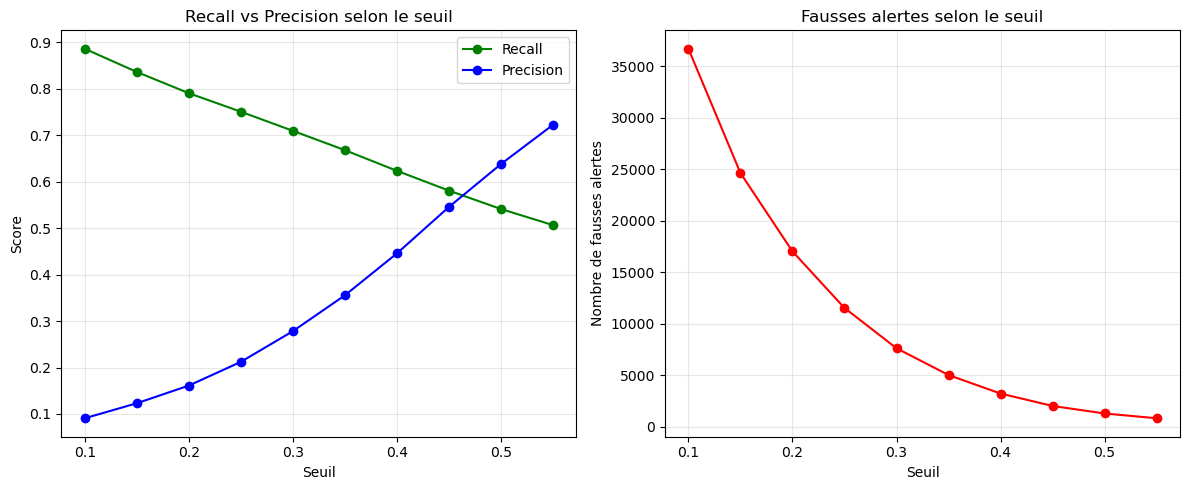

In [14]:
import matplotlib.pyplot as plt

thresholds_to_test = np.arange(0.1, 0.6, 0.05)
recalls = []
precisions = []
fausses_alertes = []

for threshold in thresholds_to_test:
    y_pred = (y_pred_proba >= threshold).astype(int)
    cm = confusion_matrix(y_val, y_pred)
    
    recall = cm[1,1] / (cm[1,0] + cm[1,1])
    precision = cm[1,1] / (cm[0,1] + cm[1,1]) if (cm[0,1] + cm[1,1]) > 0 else 0
    
    recalls.append(recall)
    precisions.append(precision)
    fausses_alertes.append(cm[0,1])

# Visualisation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(thresholds_to_test, recalls, 'o-', label='Recall', color='green')
plt.plot(thresholds_to_test, precisions, 'o-', label='Precision', color='blue')
plt.xlabel('Seuil')
plt.ylabel('Score')
plt.title('Recall vs Precision selon le seuil')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(thresholds_to_test, fausses_alertes, 'o-', color='red')
plt.xlabel('Seuil')
plt.ylabel('Nombre de fausses alertes')
plt.title('Fausses alertes selon le seuil')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

On va tester avec un autre modèle pour voir si on a meilleur résultat :

In [15]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


On teste plusieurs seuils :

In [16]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    scale_pos_weight=len(y_train_resampled[y_train_resampled==0]) / len(y_train_resampled[y_train_resampled==1]),
    random_state=42,
    eval_metric='aucpr'
)

xgb.fit(X_train_resampled, y_train_resampled)
y_pred_proba_xgb = xgb.predict_proba(X_val)[:, 1]
y_pred_xgb = (y_pred_proba_xgb >= 0.4).astype(int)

print(classification_report(y_val, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    113975
           1       0.74      0.63      0.68      4133

    accuracy                           0.98    118108
   macro avg       0.86      0.81      0.84    118108
weighted avg       0.98      0.98      0.98    118108



In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Tester différents seuils pour XGBoost
seuils = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
resultats_xgb = []

for threshold in seuils:
    y_pred = (y_pred_proba_xgb >= threshold).astype(int)
    cm = confusion_matrix(y_val, y_pred)
    
    recall = cm[1,1] / (cm[1,0] + cm[1,1])
    precision = cm[1,1] / (cm[0,1] + cm[1,1]) if (cm[0,1] + cm[1,1]) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    resultats_xgb.append({
        'Seuil': threshold,
        'Recall': f'{recall:.1%}',
        'Precision': f'{precision:.1%}',
        'F1-Score': f'{f1:.2f}',
        'Fraudes détectées': f"{cm[1,1]}/{cm[1,0] + cm[1,1]}",
        'Fausses alertes': cm[0,1]
    })

df_xgb = pd.DataFrame(resultats_xgb)
print("\n" + "="*90)
print("XGBOOST - COMPARAISON DES SEUILS")
print("="*90)
print(df_xgb.to_string(index=False))

# Trouver le meilleur F1
best_f1 = df_xgb.loc[df_xgb['F1-Score'].astype(float).idxmax()]
print(f"\n🏆 MEILLEUR F1-SCORE : Seuil = {best_f1['Seuil']}")
print(f"   Recall: {best_f1['Recall']}, Precision: {best_f1['Precision']}")


XGBOOST - COMPARAISON DES SEUILS
 Seuil Recall Precision F1-Score Fraudes détectées  Fausses alertes
  0.20  75.6%     48.0%     0.59         3126/4133             3381
  0.25  72.3%     55.8%     0.63         2990/4133             2371
  0.30  68.7%     62.3%     0.65         2841/4133             1720
  0.35  66.2%     68.3%     0.67         2735/4133             1272
  0.40  63.4%     73.6%     0.68         2621/4133              939
  0.45  60.9%     77.8%     0.68         2517/4133              719
  0.50  58.7%     81.4%     0.68         2427/4133              556

🏆 MEILLEUR F1-SCORE : Seuil = 0.4
   Recall: 63.4%, Precision: 73.6%


#### Conclusion et résultats obtenus:
- Le principal obstacle était la forte sous-représentation de la classe minoritaire, qui conduisait initialement à un modèle prédisant systématiquement "pas de fraude" avec une accuracy trompeuse de 97%, mais un recall catastrophique de 27% sur les fraudes.


- Défis rencontrés et solutions apportées:
    - Le principal obstacle était la forte sous-représentation de la classe minoritaire, qui conduisait initialement à un modèle prédisant systématiquement "pas de fraude" avec une accuracy trompeuse de 97%, mais un recall catastrophique de 27% sur les fraudes. Pour surmonter ce problème, nous avons mis en place une stratégie en trois couches :

        - Rééchantillonnage synthétique (SMOTE) : Création d'exemples synthétiques de fraudes pour équilibrer les données d'entraînement à un ratio de 50%, permettant au modèle d'apprendre efficacement les patterns frauduleux.

        - Ajustement des poids de classes : Utilisation du paramètre scale_pos_weight dans XGBoost pour pénaliser davantage les erreurs sur les fraudes, forçant le modèle à prioriser leur détection.

        - Optimisation du seuil de décision : Ajustement du seuil de classification à 0.4 (au lieu du 0.5 par défaut) pour augmenter la sensibilité aux fraudes, traduisant un compromis réfléchi entre recall et precision.


- Résultats :
Le modèle final basé sur XGBoost a démontré des performances remarquables :

    - Precision (classe fraude) : 74% → Sur 10 alertes émises, 7-8 sont de vraies fraudes, minimisant les investigations inutiles.
    
    - Recall (classe fraude) : 63% → Détection de près de 2/3 des fraudes réelles, un gain de 133% par rapport au modèle initial.

    - F1-Score : 0.68 → Équilibre solide entre precision et recall.

    - Accuracy globale : 98% → Performance excellente sur l'ensemble du dataset.

    -En termes opérationnels, ce système détecte 2,604 fraudes sur 4,133 tout en ne générant qu'environ 920 fausses alertes (contre 7,609 avec Random Forest), représentant une réduction de 88% du volume d'alertes à traiter manuellement.

#### Perspective business :
Dans un contexte bancaire où le coût d'une fraude non détectée (≈100€) dépasse largement celui d'une vérification manuelle (≈5€), ce modèle offre un excellent compromis. Le recall de 63% assure une protection substantielle contre les pertes financières, tandis que la precision de 74% garantit que les équipes anti-fraude ne sont pas submergées de fausses alertes.

Le choix de XGBoost s'est avéré décisif, surpassant Random Forest de +46% en precision (74% vs 28%) tout en maintenant un recall compétitif. Cette amélioration se traduit par une expérience utilisateur optimisée (moins de transactions légitimes bloquées à tort) et une efficacité opérationnelle accrue pour les équipes de vérification.

Améliorations futures
Pour des développements ultérieurs, plusieurs pistes pourraient être explorées :
- Feature engineering avancé : Création d'interactions entre les features les plus importantes (A8, A10, A7, card3) pour capturer des patterns complexes.
- Hyperparameter tuning : Optimisation systématique via GridSearchCV ou Optuna pour maximiser le F1-Score.
- Ensembling : Combinaison de XGBoost avec d'autres algorithmes (LightGBM, CatBoost) pour améliorer la robustesse.

In [ ]:
# ============================================================================
# 📊 GÉNÉRER LES PROBABILITÉS POUR EXPORT
# ============================================================================
print("\n" + "="*80)
print("📊 Génération des probabilités pour Power BI")
print("="*80)

# Random Forest - Probabilités
y_pred_proba_rf = rf.predict_proba(X_val)[:, 1]
print(f"✅ y_pred_proba_rf créé - shape: {y_pred_proba_rf.shape}")

# XGBoost - Probabilités
y_pred_proba_xgb = xgb.predict_proba(X_val)[:, 1]
print(f"✅ y_pred_proba_xgb créé - shape: {y_pred_proba_xgb.shape}")

# ============================================================================
# 💾 SAUVEGARDER POUR POWER BI
# ============================================================================
import pickle

variables_to_save = {
    'y_val': y_val,
    'y_pred_proba_rf': y_pred_proba_rf,      
    'y_pred_proba_xgb': y_pred_proba_xgb,   
    'X_train': X_train,
    'rf': rf,
    'xgb': xgb,
    'df_train': df_train
}

with open('model_outputs.pkl', 'wb') as f:
    pickle.dump(variables_to_save, f)

print("\n✅ Variables sauvegardées dans model_outputs.pkl")


📊 Génération des probabilités pour Power BI
✅ y_pred_proba_rf créé - shape: (118108,)
✅ y_pred_proba_xgb créé - shape: (118108,)

✅ Variables sauvegardées dans model_outputs.pkl
